# IMPORT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# DATA

In [2]:
google_sheets_id = '11wzPG0Ac0Ng7uRp2GoK_tlkktxMX54KnbP9a0Q8p5To'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheets_id + '/export?format=xlsx'
cinema = pd.read_excel(url, sheet_name='cinema_hall_ticket_sales')

In [3]:
cinema.head()

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,1,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes


## Exploratory data Analysis

In [22]:
# check data
print(cinema.describe())

print(cinema.shape)

print(cinema.info())

print(cinema.isnull().sum())

               Age  Ticket_Price  Number_of_Person
count  1440.000000   1440.000000       1440.000000
mean     38.904861     17.383972          2.881944
std      12.426293      4.397087          2.192591
min      18.000000     10.010000          1.000000
25%      28.000000     13.640000          1.000000
50%      39.000000     17.280000          2.000000
75%      50.000000     21.392500          5.000000
max      60.000000     24.990000          7.000000
(1440, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticket_ID         1440 non-null   object 
 1   Age               1440 non-null   int64  
 2   Ticket_Price      1440 non-null   float64
 3   Movie_Genre       1440 non-null   object 
 4   Seat_Type         1440 non-null   object 
 5   Number_of_Person  1440 non-null   int64  
 6   Purchase_Again    1440 non-null   object 
dt

In [23]:
cinema.sample(10)

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
675,Y0798,43,23.69,Sci-Fi,Standard,7,No
1402,T4015,29,11.16,Comedy,Premium,3,No
1193,V3147,23,12.97,Drama,Premium,1,No
905,G4508,34,19.90,Comedy,Premium,1,Yes
533,D6725,45,14.17,Sci-Fi,Premium,7,No
678,Z0104,35,24.65,Drama,Standard,1,Yes
553,L0821,50,23.19,Horror,Standard,3,Yes
1081,L9634,22,11.39,Comedy,VIP,1,Yes
1376,Y2384,25,16.56,Sci-Fi,VIP,1,No
1050,H4515,37,12.87,Action,VIP,1,Yes


In [24]:
# Unique Value
print('Movie Genre:', cinema['Movie_Genre'].unique())

print('Seat Type:', cinema['Seat_Type'].unique())

print('Purchase Again', cinema['Purchase_Again'].unique())

print('Number of Person', cinema['Number_of_Person'].unique())

Movie Genre: ['Comedy' 'Drama' 'Horror' 'Action' 'Sci-Fi']
Seat Type: ['Standard' 'VIP' 'Premium']
Purchase Again ['No' 'Yes']
Number of Person [7 1 3 6 4 2 5]


In [25]:
counts = cinema['Movie_Genre'].value_counts()
print(counts)

Movie_Genre
Action    310
Horror    299
Comedy    287
Drama     286
Sci-Fi    258
Name: count, dtype: int64


In [26]:
#  Statistical Summary
print('Total number of person:', cinema['Number_of_Person'].sum())

print('Total number of ticket price:', cinema['Ticket_Price'].sum())

print('Average number of ticket price:', cinema['Ticket_Price'].mean())

Total number of person: 4150
Total number of ticket price: 25032.92
Average number of ticket price: 17.38397222222222


In [27]:
# Number of purchase again (yes)
purchase_again_yes = cinema[cinema['Purchase_Again'] == 'Yes']
print('Number of purchase again (yes):', len(purchase_again_yes))

# Number of purchase again (no)
purchase_again_no = cinema[cinema['Purchase_Again'] == 'No']
print('Number of purchase again (no):', len(purchase_again_no))

Number of purchase again (yes): 707
Number of purchase again (no): 733


# CORRELATION

## Heatmap & Pair plot


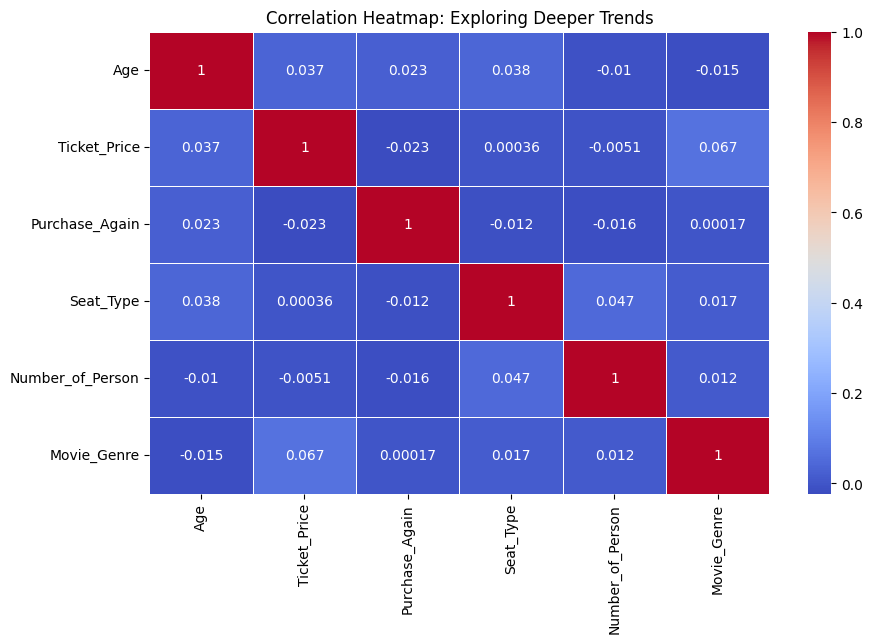

In [29]:
# Convert categorical variables to numerical for correlation analysis
df_encoded = cinema.copy()
df_encoded['Purchase_Again'] = df_encoded['Purchase_Again'].map({'Yes': 1, 'No': 0})
df_encoded['Seat_Type'] = df_encoded['Seat_Type'].astype('category').cat.codes  # Convert seat type to numerical
df_encoded['Movie_Genre'] = df_encoded['Movie_Genre'].astype('category').cat.codes  # Convert genres

correlation_matrix = df_encoded[['Age', 'Ticket_Price', 'Purchase_Again', 'Seat_Type', 'Number_of_Person', 'Movie_Genre']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: Exploring Deeper Trends")
plt.show()

In [32]:
# Correlation
correlation_matrix = df_encoded[['Age', 'Ticket_Price', 'Purchase_Again', 'Seat_Type', 'Number_of_Person', 'Movie_Genre']].corr()
print(correlation_matrix)

                       Age  Ticket_Price  Purchase_Again  Seat_Type  \
Age               1.000000      0.036528        0.023401   0.038195   
Ticket_Price      0.036528      1.000000       -0.022706   0.000363   
Purchase_Again    0.023401     -0.022706        1.000000  -0.012377   
Seat_Type         0.038195      0.000363       -0.012377   1.000000   
Number_of_Person -0.010283     -0.005127       -0.015549   0.046730   
Movie_Genre      -0.015363      0.066534        0.000167   0.017164   

                  Number_of_Person  Movie_Genre  
Age                      -0.010283    -0.015363  
Ticket_Price             -0.005127     0.066534  
Purchase_Again           -0.015549     0.000167  
Seat_Type                 0.046730     0.017164  
Number_of_Person          1.000000     0.012413  
Movie_Genre               0.012413     1.000000  


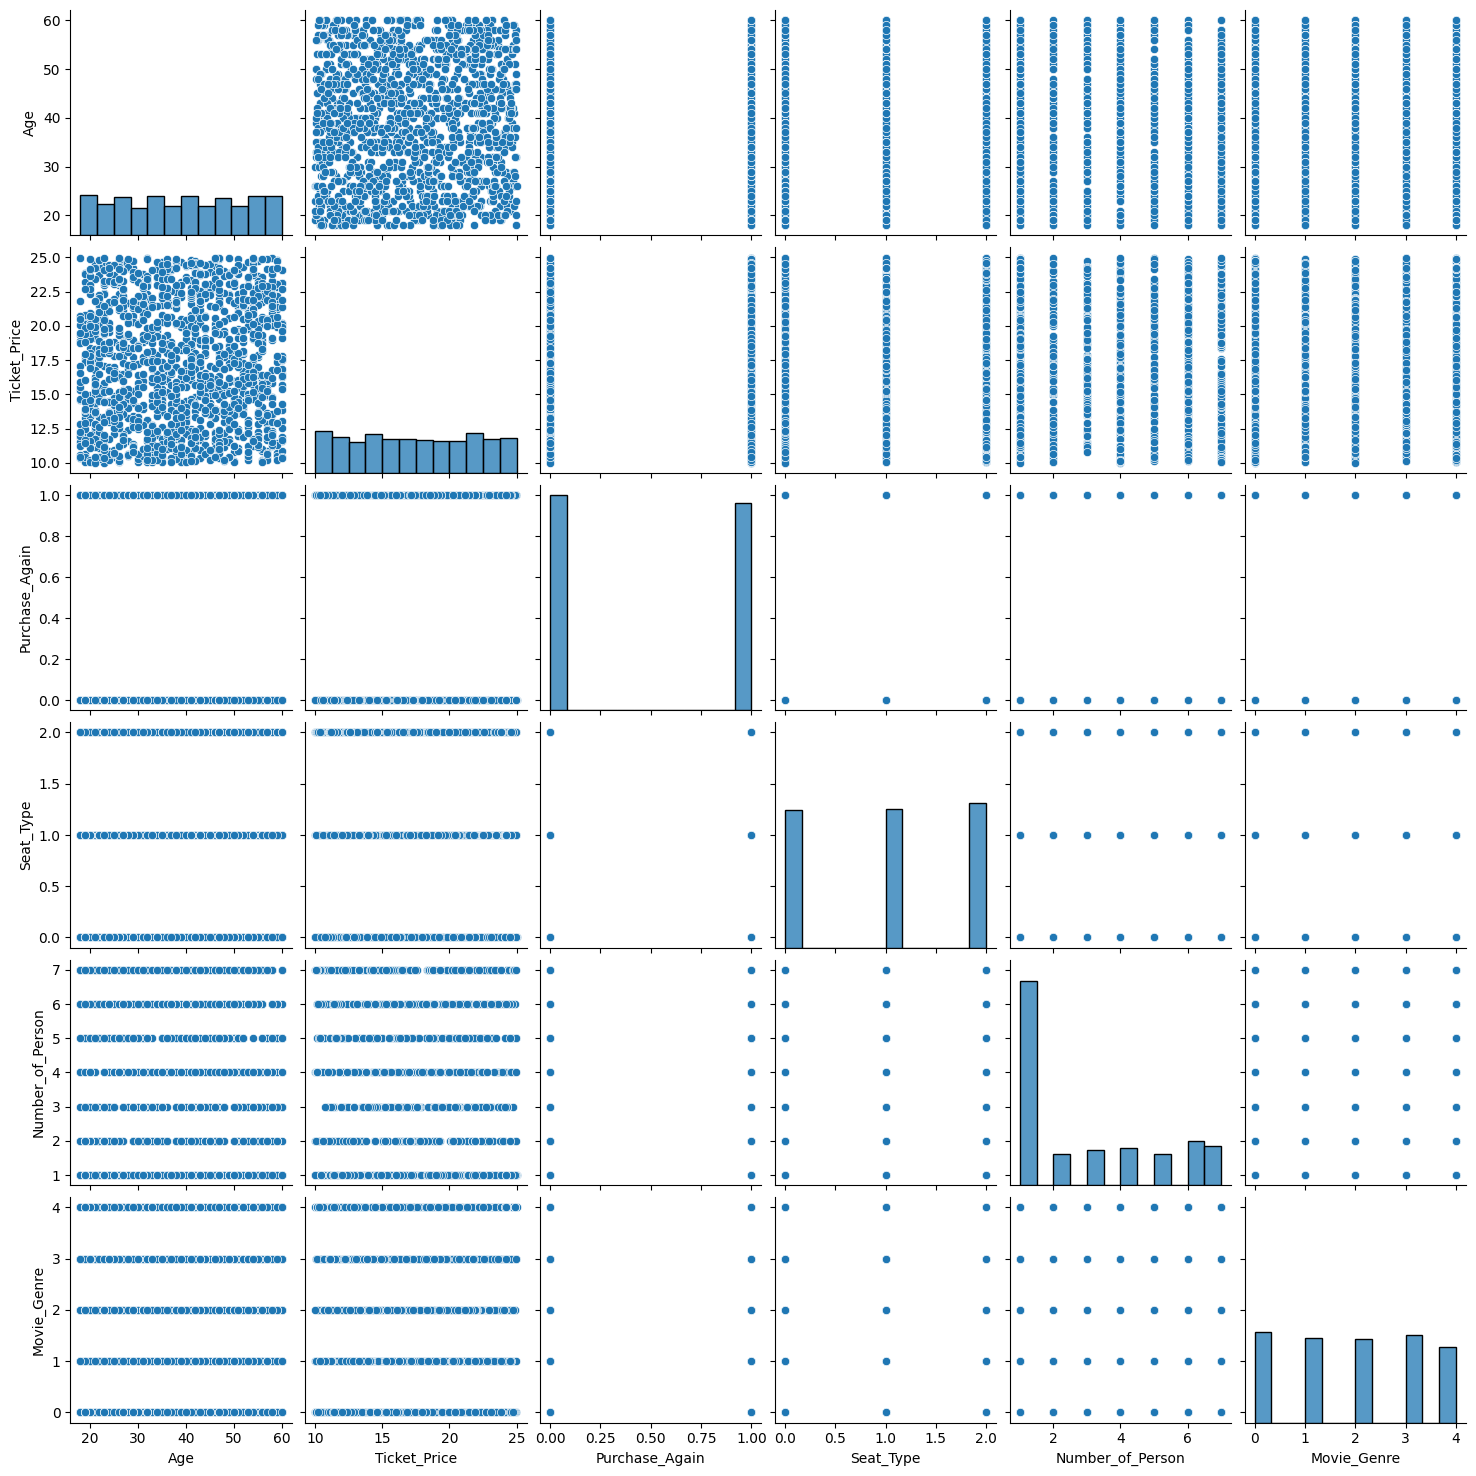

In [33]:
# Pair Plot
sns.pairplot(df_encoded[['Age', 'Ticket_Price', 'Purchase_Again', 'Seat_Type', 'Number_of_Person', 'Movie_Genre']])
plt.show()

## Regression: Ticket price vs Purchase again, seat type

In [15]:
cinema_encoded = pd.get_dummies(cinema, columns=['Movie_Genre', 'Seat_Type', 'Purchase_Again'])

In [16]:
cinema_encoded.head()

,Ticket_ID,Age,Ticket_Price,Number_of_Person,Movie_Genre_Action,Movie_Genre_Comedy,Movie_Genre_Drama,Movie_Genre_Horror,Movie_Genre_Sci-Fi,Seat_Type_Premium,Seat_Type_Standard,Seat_Type_VIP,Purchase_Again_No,Purchase_Again_Yes
0,N4369,55,12.27,7,False,True,False,False,False,False,True,False,True,False
1,B8091,35,19.02,1,False,False,True,False,False,False,True,False,False,True
2,V6341,55,22.52,3,False,False,False,True,False,False,False,True,True,False
3,B3243,53,23.01,6,False,False,True,False,False,False,True,False,False,True
4,I3814,30,21.81,4,False,True,False,False,False,False,False,True,False,True


In [17]:
cinema_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ticket_ID           1440 non-null   object 
 1   Age                 1440 non-null   int64  
 2   Ticket_Price        1440 non-null   float64
 3   Number_of_Person    1440 non-null   int64  
 4   Movie_Genre_Action  1440 non-null   bool   
 5   Movie_Genre_Comedy  1440 non-null   bool   
 6   Movie_Genre_Drama   1440 non-null   bool   
 7   Movie_Genre_Horror  1440 non-null   bool   
 8   Movie_Genre_Sci-Fi  1440 non-null   bool   
 9   Seat_Type_Premium   1440 non-null   bool   
 10  Seat_Type_Standard  1440 non-null   bool   
 11  Seat_Type_VIP       1440 non-null   bool   
 12  Purchase_Again_No   1440 non-null   bool   
 13  Purchase_Again_Yes  1440 non-null   bool   
dtypes: bool(10), float64(1), int64(2), object(1)
memory usage: 59.2+ KB


In [18]:
exclude_cols =['Ticket_ID' , 'Age' , 'Ticket_Price', 'Number_of_Person']
cinema_encoded1 = cinema_encoded.apply(lambda x: x.astype(int) if x.name not in exclude_cols else x)

In [19]:
cinema_encoded1.sample(10)

,Ticket_ID,Age,Ticket_Price,Number_of_Person,Movie_Genre_Action,Movie_Genre_Comedy,Movie_Genre_Drama,Movie_Genre_Horror,Movie_Genre_Sci-Fi,Seat_Type_Premium,Seat_Type_Standard,Seat_Type_VIP,Purchase_Again_No,Purchase_Again_Yes
334,P8545,47,14.69,6,0,0,1,0,0,1,0,0,0,1
1233,J3002,36,23.45,1,0,1,0,0,0,0,0,1,0,1
1403,L0126,31,22.92,1,0,0,1,0,0,1,0,0,0,1
482,X0475,18,11.50,2,0,0,0,1,0,0,0,1,0,1
63,O8372,36,23.99,1,0,0,0,0,1,0,0,1,1,0
794,D9547,48,13.81,4,1,0,0,0,0,1,0,0,1,0
1021,Z4627,47,24.08,6,0,1,0,0,0,1,0,0,1,0
1279,R4299,39,15.57,1,0,0,0,0,1,0,1,0,1,0
1357,D8615,21,10.02,1,0,0,1,0,0,1,0,0,1,0
544,N2970,54,17.27,4,0,0,0,1,0,1,0,0,1,0


In [20]:
cinema_encoded1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ticket_ID           1440 non-null   object 
 1   Age                 1440 non-null   int64  
 2   Ticket_Price        1440 non-null   float64
 3   Number_of_Person    1440 non-null   int64  
 4   Movie_Genre_Action  1440 non-null   int64  
 5   Movie_Genre_Comedy  1440 non-null   int64  
 6   Movie_Genre_Drama   1440 non-null   int64  
 7   Movie_Genre_Horror  1440 non-null   int64  
 8   Movie_Genre_Sci-Fi  1440 non-null   int64  
 9   Seat_Type_Premium   1440 non-null   int64  
 10  Seat_Type_Standard  1440 non-null   int64  
 11  Seat_Type_VIP       1440 non-null   int64  
 12  Purchase_Again_No   1440 non-null   int64  
 13  Purchase_Again_Yes  1440 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 157.6+ KB


In [ ]:
# Regression
x1 = cinema_encoded1[['Seat_Type_Premium', 'Seat_Type_Standard', 'Seat_Type_VIP', 'Purchase_Again_No', 'Purchase_Again_Yes']]
y1 = cinema_encoded1['Ticket_Price']

x = sm.add_constant(x1)
model = sm.OLS(y1, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket_Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7797
Date:                Wed, 19 Mar 2025   Prob (F-statistic):              0.505
Time:                        21:04:47   Log-Likelihood:                -4174.2
No. Observations:                1440   AIC:                             8356.
Df Residuals:                    1436   BIC:                             8377.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.4807      0

**KẾT LUẬN**: mô hình không tốt, không thể dự đoán giá vé

## Logistic: Purchase again vs Seat type, Age, Movie Genre

In [ ]:
x2 = cinema_encoded1[['Seat_Type_Premium', 'Seat_Type_Standard', 'Seat_Type_VIP', 'Age', 'Movie_Genre_Action', 'Movie_Genre_Comedy', 'Movie_Genre_Drama','Movie_Genre_Horror']]
y2 = cinema_encoded1['Purchase_Again_Yes']

X2 = sm.add_constant(x2)
model = sm.Logit(y2, X2).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.689150
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     Purchase_Again_Yes   No. Observations:                 1440
Model:                          Logit   Df Residuals:                     1432
Method:                           MLE   Df Model:                            7
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                0.005533
Time:                        20:50:55   Log-Likelihood:                -992.38
converged:                       True   LL-Null:                       -997.90
Covariance Type:            nonrobust   LLR p-value:                    0.1368
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2286   3.78e+06  -6.05e-08      1.000   -7.41e+06    7.41e+06
Seat_

**KẾT LUẬN**: các biến tương quan thấp, không có giá trị về mặt thống kê